In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
mpgdata = pd.read_csv("car-mpg.csv")

In [3]:
#mpgdata

In [4]:
mpgdata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [5]:
mpgdata = mpgdata.drop('car_name', axis = 1)

In [6]:
#mpgdata

In [7]:
mpgdata['origin'] = mpgdata['origin'].replace({1: 'america', 2: 'europe',3: 'asia'})

In [8]:
mpgdata.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type
0,18.0,8,307.0,130,3504,12.0,70,america,0
1,15.0,8,350.0,165,3693,11.5,70,america,0
2,18.0,8,318.0,150,3436,11.0,70,america,0
3,16.0,8,304.0,150,3433,12.0,70,america,0
4,17.0,8,302.0,140,3449,10.5,70,america,0


In [9]:
mpgdata = pd.get_dummies(mpgdata, columns = ['origin'])

mpgdata.head()

In [10]:
mpgdata.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [11]:
mpgdata.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
car_type,398.0,0.530151,0.499718,0.0,0.000,1.0,1.000,1.0
origin_america,398.0,0.625628,0.484569,0.0,0.000,1.0,1.000,1.0
origin_asia,398.0,0.198492,0.399367,0.0,0.000,0.0,0.000,1.0
origin_europe,398.0,0.175879,0.381197,0.0,0.000,0.0,0.000,1.0


In [12]:
temp = pd.DataFrame(mpgdata.hp.str.isdigit())

In [13]:
temp[temp['hp']==False]

,hp
32,False
126,False
330,False
336,False
354,False
374,False


In [14]:
mpgdata['hp'][32]

'?'

In [15]:
mpgdata = mpgdata.replace('?',np.nan)

In [16]:
mpgdata[mpgdata.isnull().any(axis=1)]

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_america,origin_asia,origin_europe
32,25.0,4,98.0,NaN,2046,19.0,71,1,1,0,0
126,21.0,6,200.0,NaN,2875,17.0,74,0,1,0,0
330,40.9,4,85.0,NaN,1835,17.3,80,1,0,0,1
336,23.6,4,140.0,NaN,2905,14.3,80,1,1,0,0
354,34.5,4,100.0,NaN,2320,15.8,81,1,0,0,1
374,23.0,4,151.0,NaN,3035,20.5,82,1,1,0,0


In [17]:
mpgdata = mpgdata.apply(lambda x: x.fillna(x.median()),axis=0)

In [18]:
mpgdata['hp'] = mpgdata['hp'].astype('float64')

In [19]:
mpgdata_attr = mpgdata.iloc[:,0:10]

In [20]:
#mpgdata_attr

In [21]:
#sns.pairplot(mpgdata)

C:\Users\SONY\Anaconda3\New folder\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


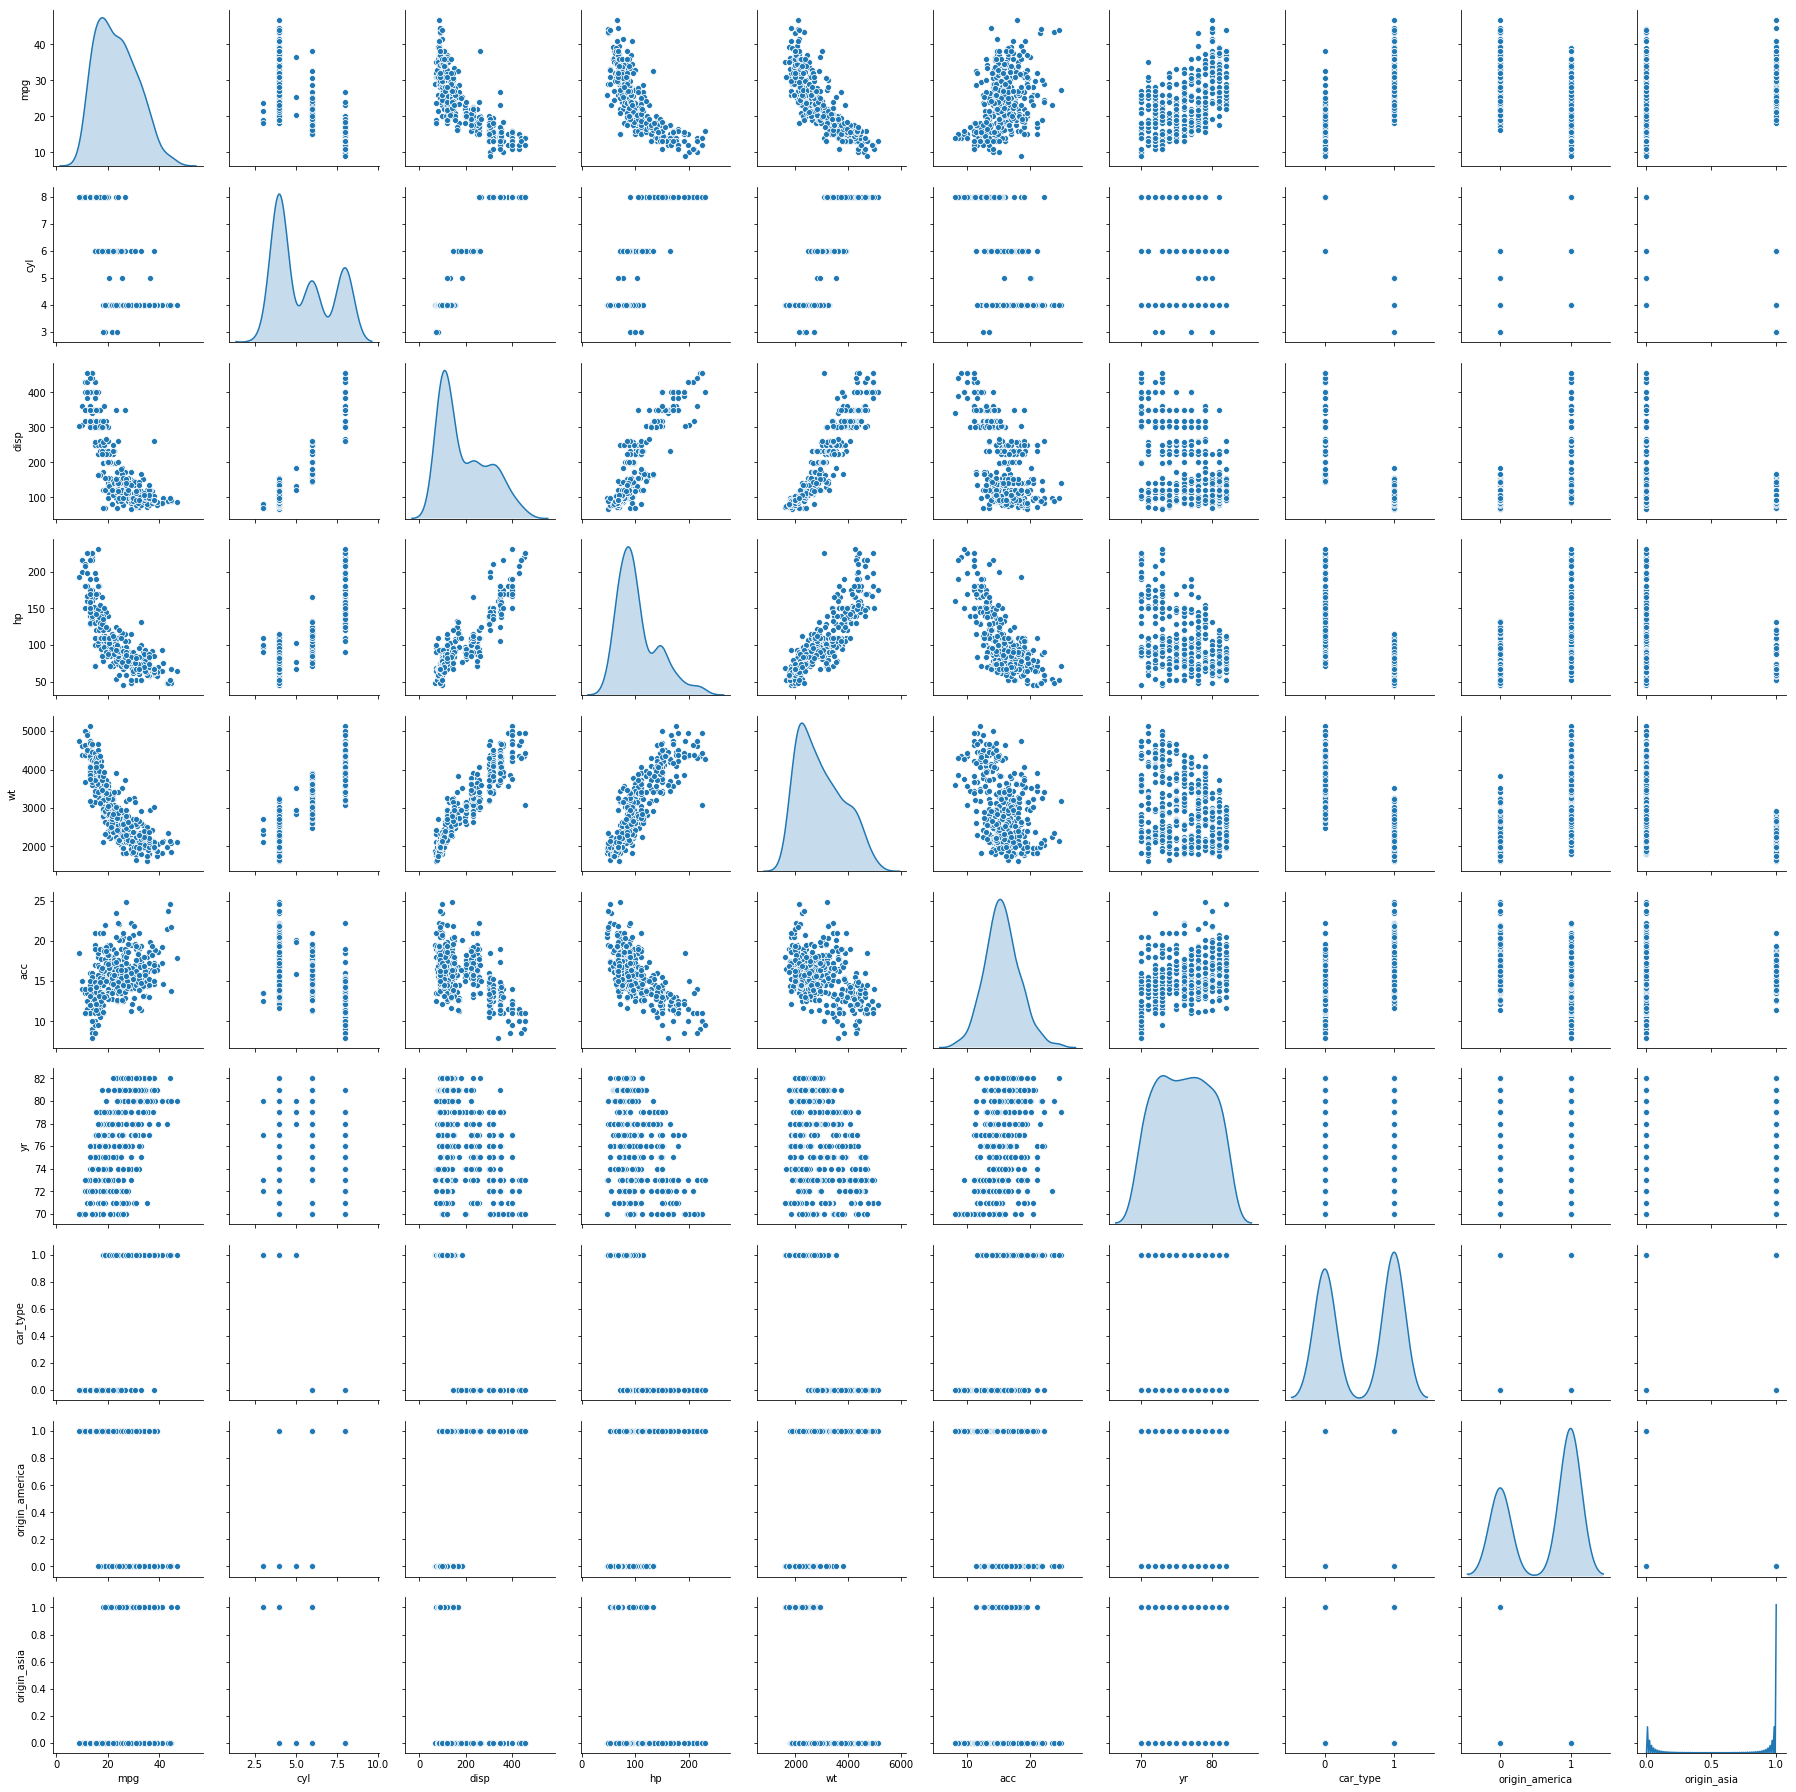

In [22]:
sns.pairplot(mpgdata_attr,diag_kind = 'kde')

In [28]:
 X = mpgdata.drop('mpg', axis = 1)

In [29]:
y = mpgdata['mpg']

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)

In [33]:
regression_model = LinearRegression()

In [34]:
regression_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
for idx, col_name in enumerate(X_train.columns):
    print("The  coefficient of  {} is {}".format(col_name,regression_model.coef_[idx]))

The  coefficient of  cyl is 1.4750732919168044
The  coefficient of  disp is 0.02434932200243143
The  coefficient of  hp is -0.046861910393252625
The  coefficient of  wt is -0.006564163296278444
The  coefficient of  acc is 0.04170227918810164
The  coefficient of  yr is 0.7938975478842012
The  coefficient of  car_type is 5.966597439861033
The  coefficient of  origin_america is -1.4243481095472237
The  coefficient of  origin_asia is 0.6521119249598706
The  coefficient of  origin_europe is 0.7722361845873514


In [37]:
regression_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)